
# Objective

Build an image classifier for the Fashion MNIST dataset using CNN and keras. 

## Dataset

This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. 
There is a training set of 60,000 images and 10,000 test images
    
    Label	Description
    
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Load Data
from tensorflow.keras.datasets import fashion_mnist

# train, test split
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Visualisation

In [7]:
x_train.shape

(60000, 28, 28)

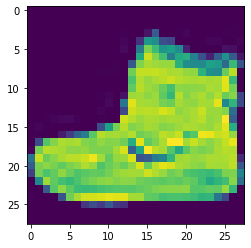

In [8]:
plt.imshow(x_train[0]);

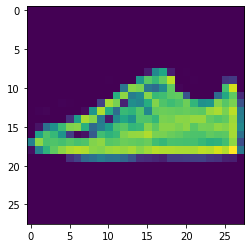

In [9]:
plt.imshow(x_train[1212]);

------

## Preprocessing the Data

### Normalisation

In [10]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [11]:
x_train = x_train/255
x_test =  x_test/255

In [12]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

### Reshaping

In [13]:
x_train[0].shape

(28, 28)

In [14]:
len(x_train), len(x_test)

(60000, 10000)

In [15]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [16]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [17]:
x_train[0].shape

(28, 28, 1)

### One-hot encoding  

In [18]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [19]:
y_cat_test = to_categorical(y_test, num_classes=10)

## Model


In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

--------

## Training the Model


In [22]:
x_train.shape, y_cat_train.shape

((60000, 28, 28, 1), (60000, 10))

In [23]:
x_test.shape, y_cat_test.shape

((10000, 28, 28, 1), (10000, 10))

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

In [25]:
fitted_model = model.fit(x=x_train, y=y_cat_train,
             validation_data=(x_test, y_cat_test),
             callbacks=[early_stopping],
             epochs=15,
             verbose=1)

Epoch 1/15
1875/1875 [==============================] - 56s 29ms/step - loss: 0.4819 - accuracy: 0.8239 - val_loss: 0.3720 - val_accuracy: 0.8634
Epoch 2/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3215 - accuracy: 0.8838 - val_loss: 0.3392 - val_accuracy: 0.8708
Epoch 3/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2820 - accuracy: 0.8974 - val_loss: 0.3459 - val_accuracy: 0.8788
Epoch 4/15
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2619 - accuracy: 0.9050 - val_loss: 0.3166 - val_accuracy: 0.8883
Epoch 5/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2481 - accuracy: 0.9100 - val_loss: 0.2989 - val_accuracy: 0.8954
Epoch 6/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2373 - accuracy: 0.9143 - val_loss: 0.3143 - val_accuracy: 0.8946
Epoch 7/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2317 - accuracy: 0.9167 - val_loss: 0.3085 -

## Evaluating the Model

In [26]:
# model matrics
model.metrics_names  

['loss', 'accuracy']

In [27]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.34780046343803406, 0.8828999996185303]

In [28]:
metrics = pd.DataFrame(fitted_model.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.481867,0.823867,0.371957,0.8634
1,0.321476,0.883767,0.339225,0.8708
2,0.281975,0.897433,0.345944,0.8788
3,0.261945,0.904967,0.316561,0.8883
4,0.248084,0.909950,0.298938,0.8954


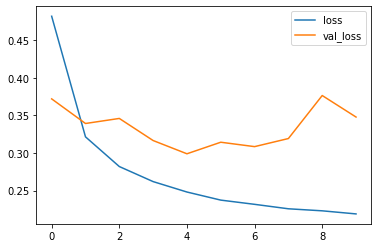

In [29]:
metrics[['loss', 'val_loss']].plot()

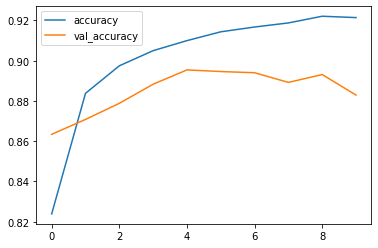

In [30]:
metrics[['accuracy', 'val_accuracy']].plot();

In [42]:
predictions = np.argmax(model.predict(x_test), axis=-1)
predictions[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [43]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [32]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.72      0.88      0.79      1000
           3       0.95      0.80      0.87      1000
           4       0.83      0.82      0.82      1000
           5       0.99      0.95      0.97      1000
           6       0.72      0.63      0.67      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [33]:
# Confusion Matrix
confusion_matrix(y_test, predictions)

array([[888,   0,  30,   5,   4,   0,  66,   0,   7,   0],
       [  9, 968,   3,   8,   6,   0,   4,   0,   2,   0],
       [ 17,   1, 883,   7,  42,   0,  50,   0,   0,   0],
       [ 52,   4,  44, 796,  41,   0,  54,   0,   9,   0],
       [  0,   0, 112,   9, 818,   0,  61,   0,   0,   0],
       [  0,   0,   0,   0,   0, 953,   0,  33,   0,  14],
       [141,   0, 138,  10,  71,   0, 630,   1,   9,   0],
       [  0,   0,   0,   0,   0,   2,   0, 958,   0,  40],
       [  6,   1,  13,   0,   3,   2,   5,   5, 965,   0],
       [  0,   0,   0,   0,   0,   5,   0,  25,   0, 970]])

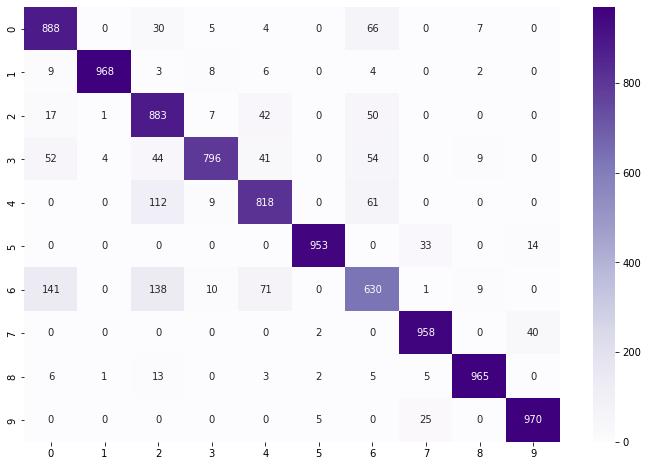

In [46]:
#heatmap confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.0f', cmap="Purples");